Tiffany Mangelli - MBD Section 1
Machine Learning II - Individual Assignment

# Predicting Broken Hearts (Heart Disease) Using ML

1. App Overview
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Overview

> This app will attempt to predict whether or not they have a heart disease aka "broken hearts" given clinical parameters about a patient

## 2. Data

The Original Data came from Cleaveland data from the UCI ML repo.:
    https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle:
    https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
    
## 3. Evaluation

> If we can reach `95%` accuracy at predicting wheather or not a patient has heart diesease during the proof of concept, we'll pursue the project.

## 4. Features

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools


In [1]:
!pip install scikit-learn==1.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 30.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("heart.csv")

print(f"Heart Disease Data :\n\t\t{df.shape[0]} Number of Rows \n\t\t&\n\t\t{df.shape[1]} Number of Columns")


Heart Disease Data :
		1025 Number of Rows 
		&
		14 Number of Columns


## Data Exploration (Exploratory Data analysis or EDA)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df["target"].value_counts()[0]

499

In [6]:
df["target"].value_counts()[1]

526

### In Data set in total `526` are the patients with heart disease and `499` are patients with no heart disease.

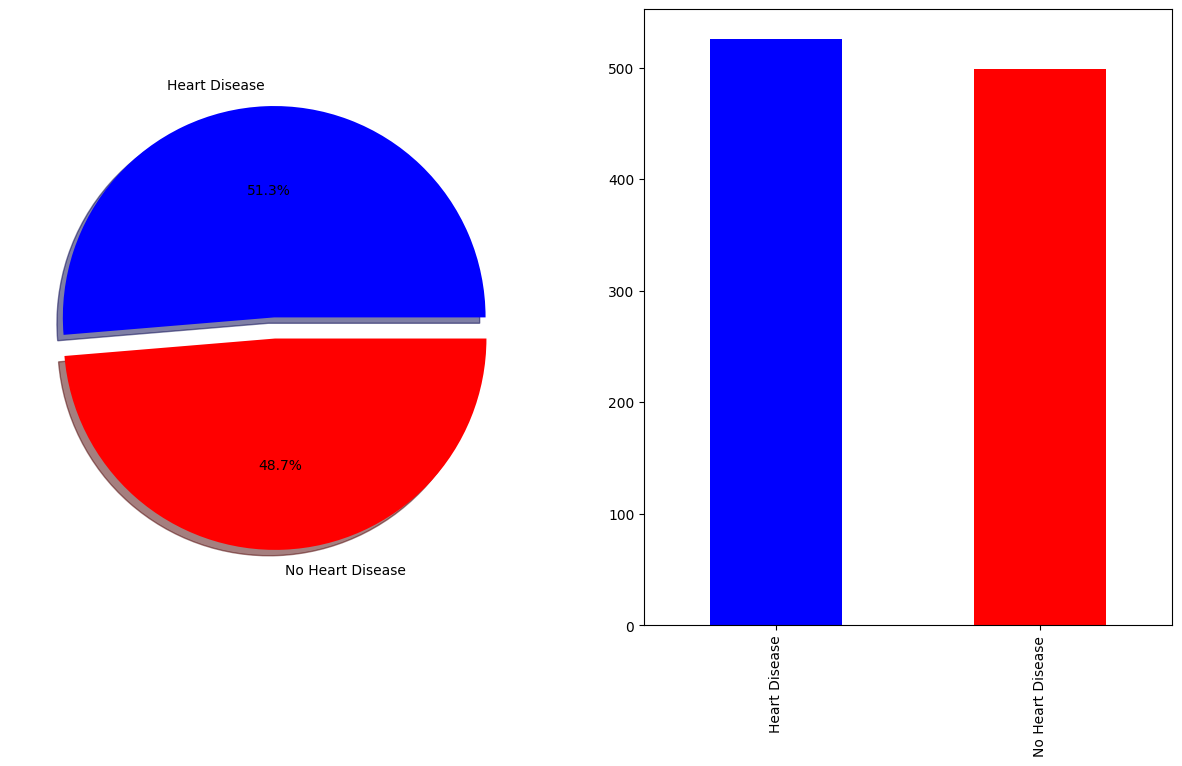

In [7]:
# Visualizing the Target
f,ax=plt.subplots(1,2,figsize=(15,8))
df["target"].replace({0:"No Heart Disease",1:"Heart Disease"}).value_counts().plot(kind="pie",colors=["blue","red"],ax=ax[0],explode=[0,0.1],autopct='%1.1f%%',shadow=True)
ax[0].set_ylabel('')
df["target"].replace({0:"No Heart Disease",1:"Heart Disease"}).value_counts().plot(kind="bar", ax = ax[1],color=["blue","red"])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

From above info about the data we understand that there are no missing values in data set, so no filling data step required.<br>
And,<br>
All columns has datatype of int and float so no conversion is needed

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


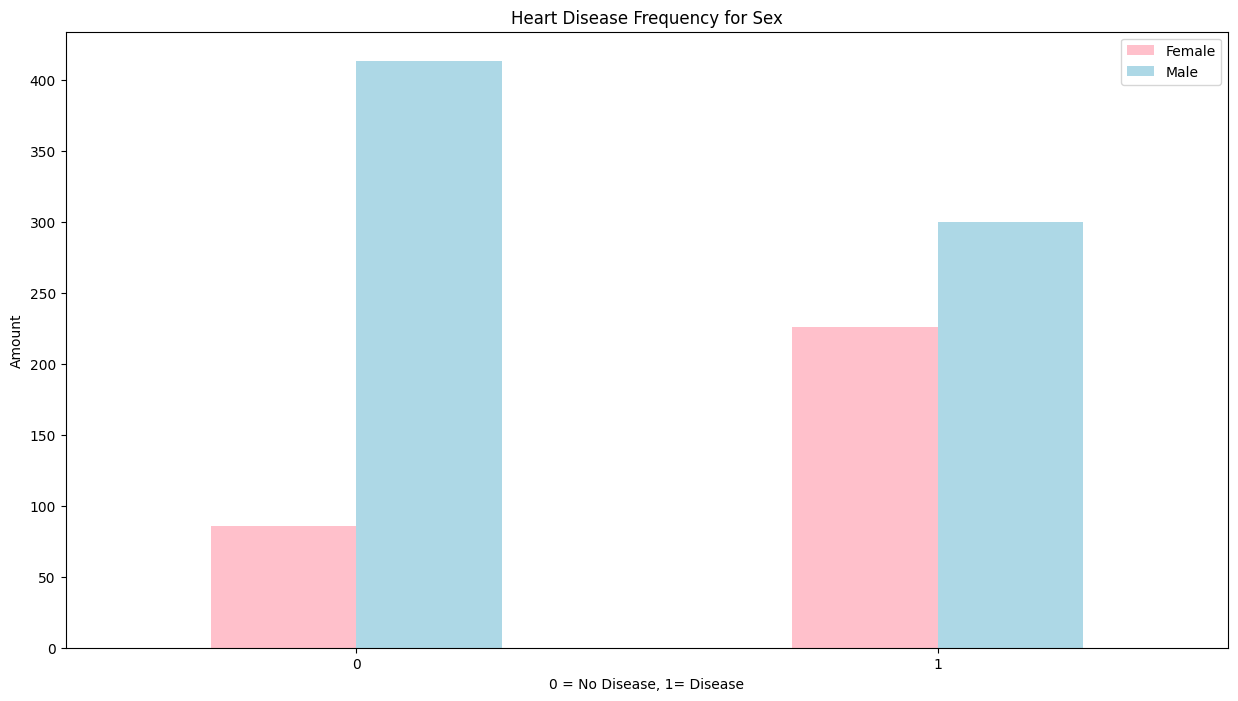

In [11]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                  figsize=(15,8),
                                  color=["pink", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)
plt.show()

### Age vs Max Heart Rate for heart Disease

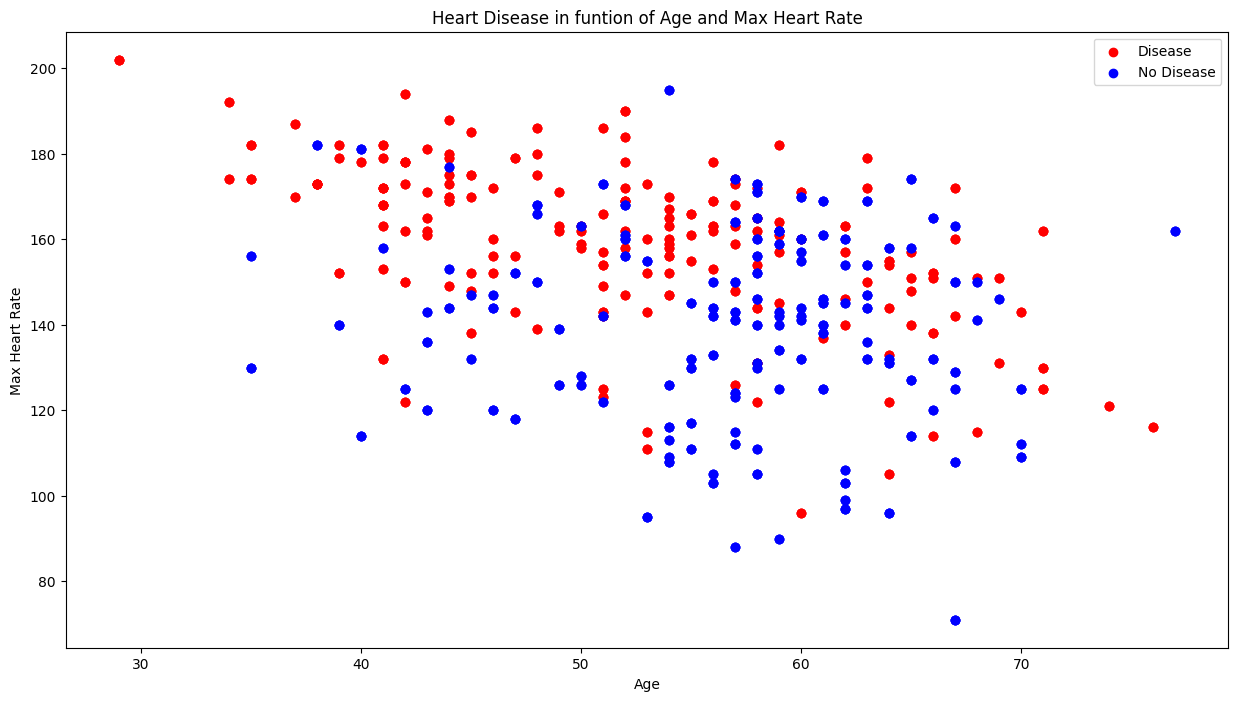

In [12]:
# Create another figure
plt.figure(figsize=(15,8))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color="red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color="blue");

# Add some helpful info
plt.title("Heart Disease in funtion of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])
plt.show()

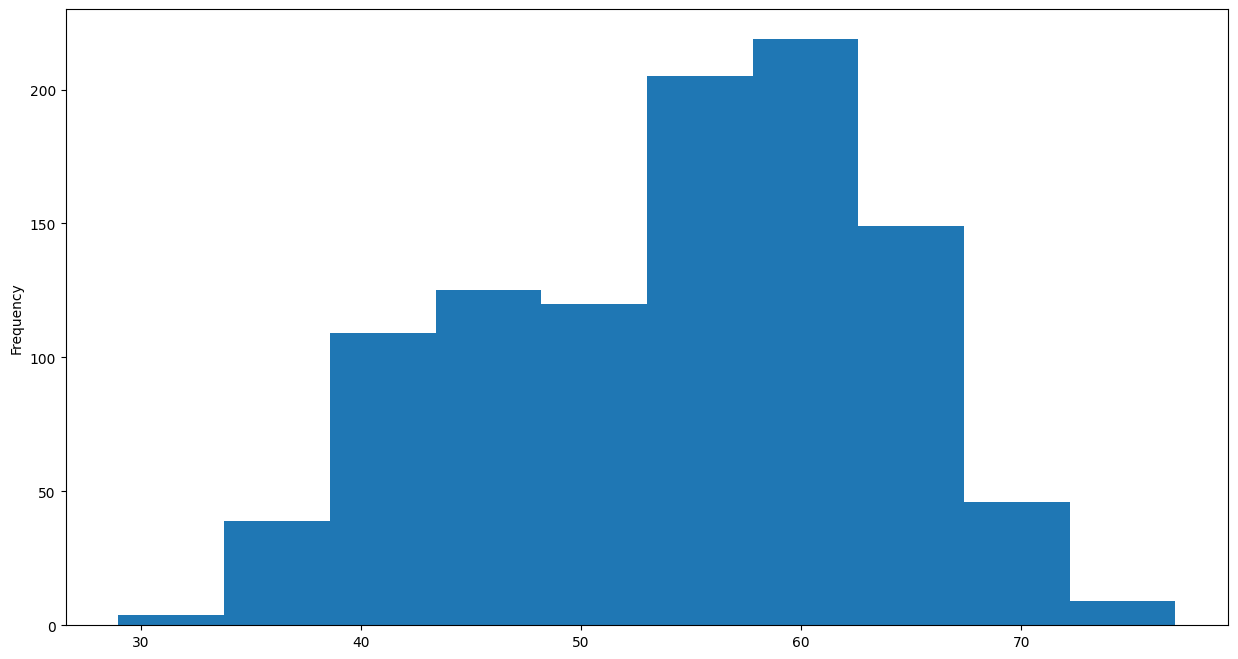

In [13]:
# Check the distribution of the age column with a histogram
df.age.plot.hist(figsize=(15,8));

## Heart Disease Frequency per Chest Pain Type
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

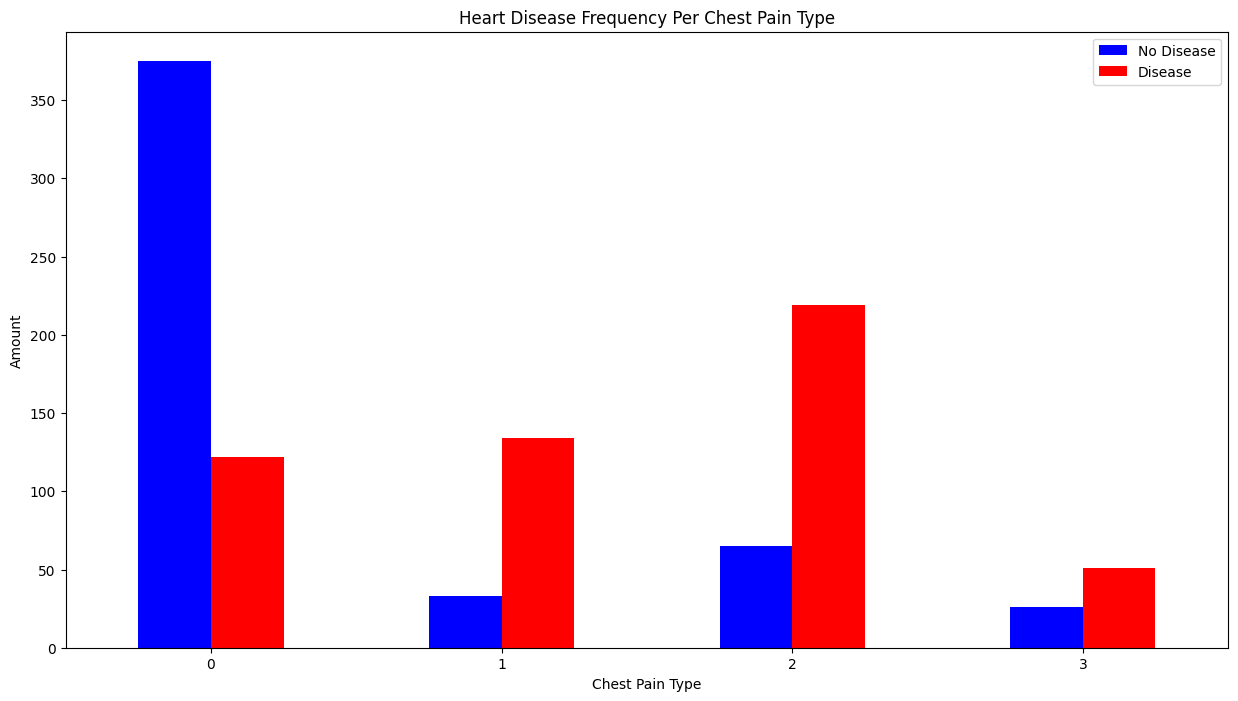

In [14]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize = (15,8),
                                 color=["blue","red"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

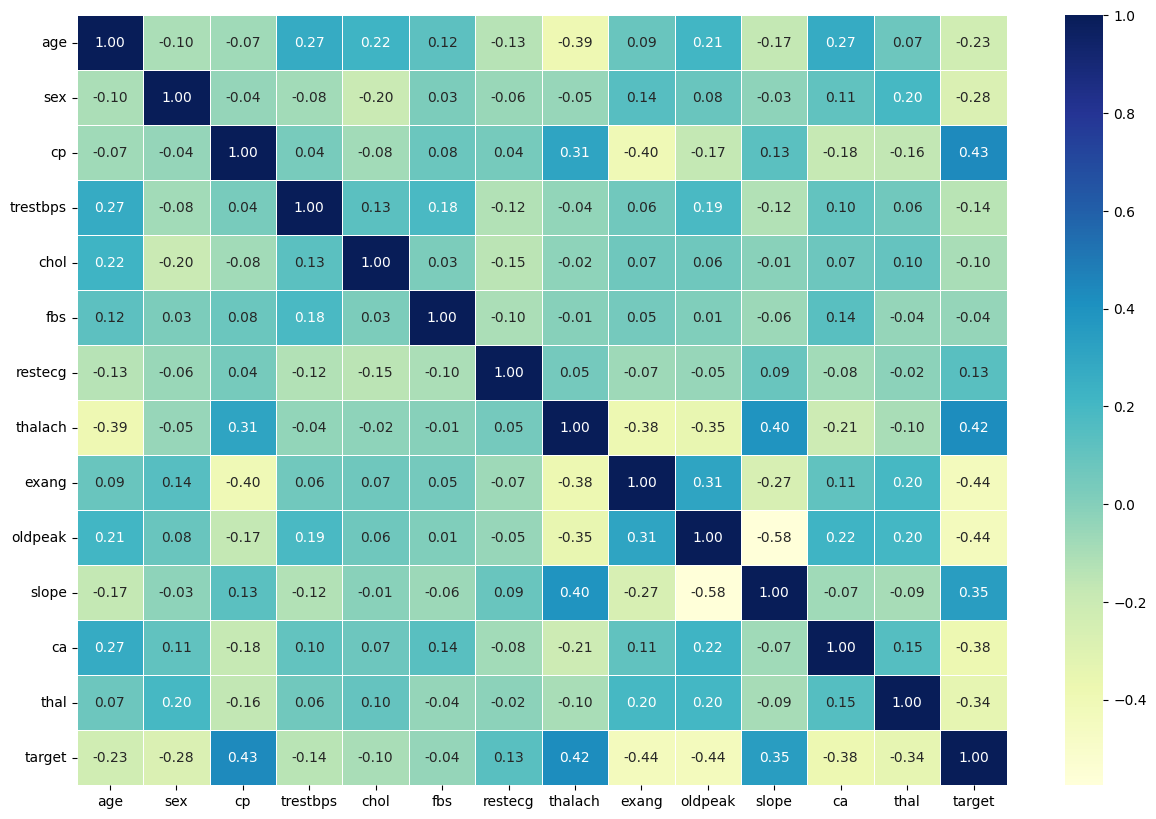

In [15]:
# correlation matrix
corr_matrix = df.corr()
fg,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")
plt.yticks(rotation=0);

## Modeling


In [16]:
# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
# Split data into X and y
X = df.drop("target",axis=1)
y = df["target"]

In [18]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now that the data is splitted into trainning and test set, we can start the **training**


In [19]:
# Create a function to fit and score KNN model

def fit_and_score(X_train, X_test, y_train, y_test):
    """
    Fits and evaluates a K-Nearest Neighbors (KNN) model
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # Set random seed
    np.random.seed(42)

    # Initialize a KNN classifier
    knn = KNeighborsClassifier()

    # Fit the KNN model to data
    knn.fit(X_train, y_train)

    # Evaluate the KNN model and return its score
    knn_score = knn.score(X_test, y_test)

    return knn_score

# Call the function and store the result
knn_score = fit_and_score(X_train, X_test, y_train, y_test)

# Print the score
print("KNN Score:", knn_score)

KNN Score: 0.7317073170731707


## Hyperparameter Tuning

In [20]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train,y_train))

    # Update the testing scores list
    test_scores.append(knn.score(X_test,y_test))

In [21]:
knn.set_params(n_neighbors = np.argmax(test_scores)+1 )
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Elbow Method

Maximum KNN score on the test data: 98.54%


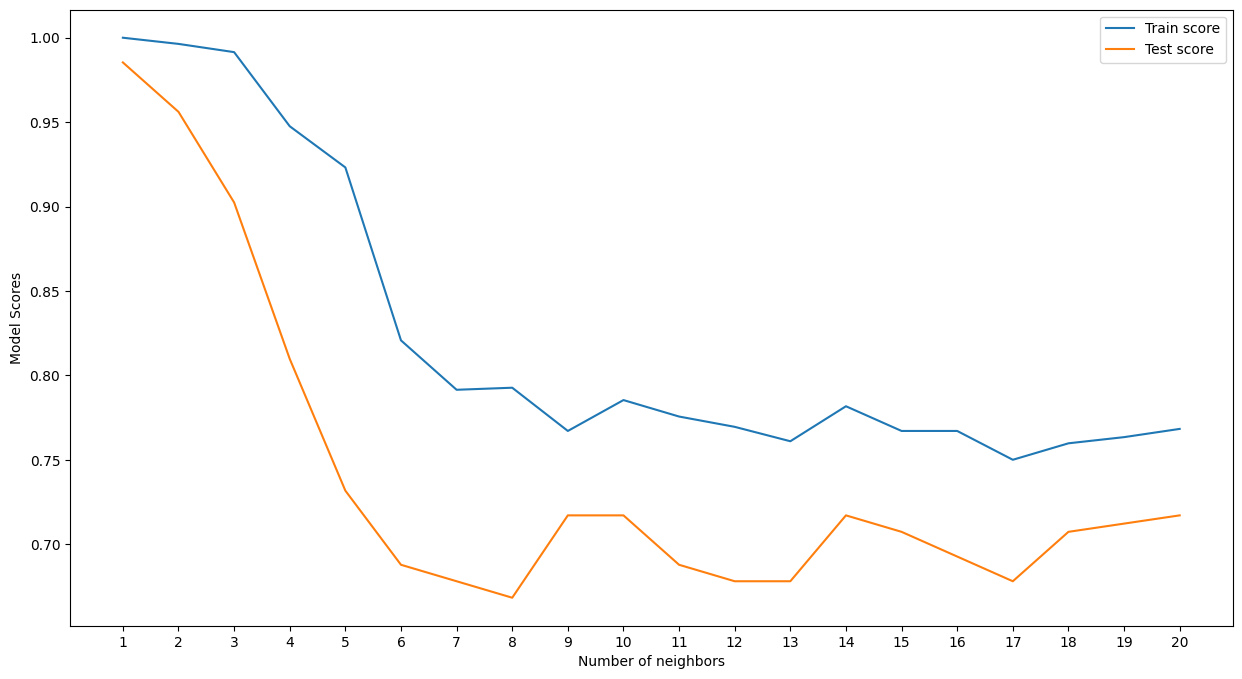

In [22]:
plt.figure(figsize=(15, 8))
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Scores")
plt.legend()


print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%");

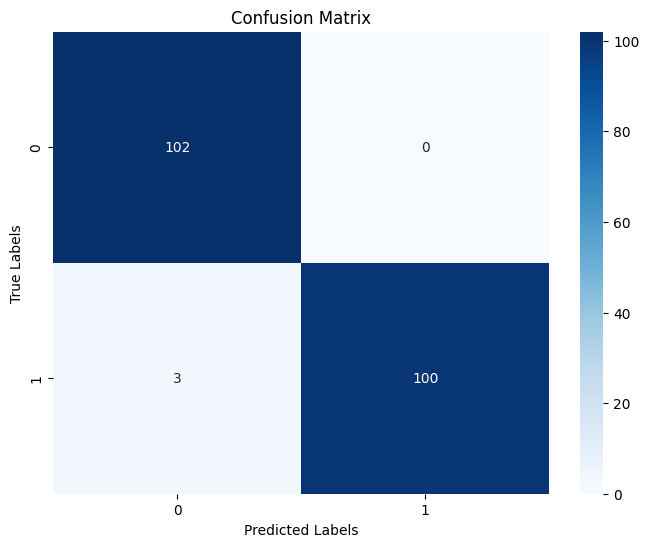

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Precision: 0.99
Recall: 0.99
F1 Score: 0.99


In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions
y_preds = knn.predict(X_test)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues',
            xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_preds))

# Precision
precision = precision_score(y_test, y_preds, average='weighted')
print("Precision: {:.2f}".format(precision))

# Recall
recall = recall_score(y_test, y_preds, average='weighted')
print("Recall: {:.2f}".format(recall))

# F1 Score
f1 = f1_score(y_test, y_preds, average='weighted')
print("F1 Score: {:.2f}".format(f1))

## Calculate evaluation metrics using CrossValidation

In [24]:
from sklearn.model_selection import cross_val_score

# Cross-validated accuracy
cv_accuracy = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print("Cross-validated Accuracy: {:.2f}%".format(np.mean(cv_accuracy) * 100))

# Cross-validated precision
cv_precision = cross_val_score(knn, X, y, cv=5, scoring='precision_weighted')
print("Cross-validated Precision: {:.2f}".format(np.mean(cv_precision)))

# Cross-validated recall
cv_recall = cross_val_score(knn, X, y, cv=5, scoring='recall_weighted')
print("Cross-validated Recall: {:.2f}".format(np.mean(cv_recall)))

# Cross-validated F1 score
cv_f1 = cross_val_score(knn, X, y, cv=5, scoring='f1_weighted')
print("Cross-validated F1 Score: {:.2f}".format(np.mean(cv_f1)))

Cross-validated Accuracy: 98.24%
Cross-validated Precision: 0.98
Cross-validated Recall: 0.98
Cross-validated F1 Score: 0.98


In [25]:
import pickle
# Save the trained model to a file
with open('hearts_knnmodel.pkl', 'wb') as file:
    pickle.dump(knn, file)